How are in-demand skills trending for Data Analysts?

Methology

    1. aggregate skill counts monthly
    2. Re-analyze based on percentage of total jobs
    3. Plot the monthly skill demand

In [34]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and pd.notnull(x) else x)

In [35]:
# df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_CA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

In [36]:
# df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month
df_DA_CA['job_posted_month_no'] = df_DA_CA['job_posted_date'].dt.month

In [37]:
# df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_CA_explode = df_DA_CA.explode('job_skills')

In [38]:
# df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value = 0)

# df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

# df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

# df_DA_US_pivot = df_DA_US_pivot.drop("Total")

# #df_DA_US_pivot.plot(kind='line')
df_DA_CA_pivot = df_DA_CA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_CA_pivot.loc['Total'] = df_DA_CA_pivot.sum()
# Sort columns by total and reorder
sorted_columns = df_DA_CA_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_CA_pivot = df_DA_CA_pivot[sorted_columns]
df_DA_CA_pivot = df_DA_CA_pivot.drop("Total")

<Axes: xlabel='job_posted_month_no'>

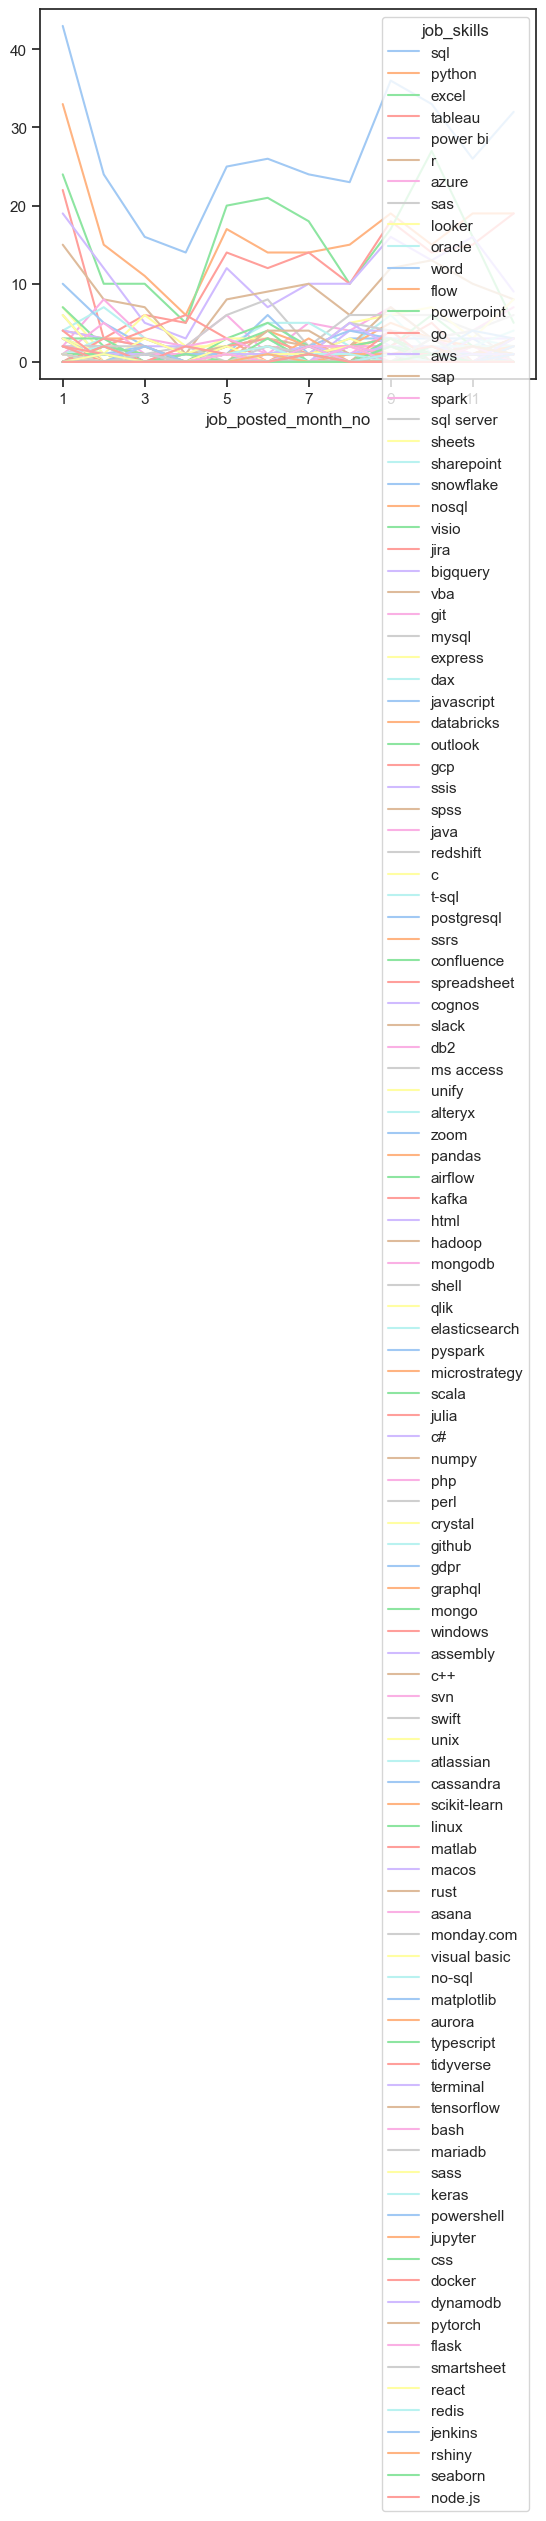

In [39]:
df_DA_CA_pivot.plot(kind='line')

In [40]:
df_DA_CA_pivot

job_skills,sql,python,excel,tableau,power bi,r,azure,sas,looker,oracle,...,dynamodb,pytorch,flask,smartsheet,react,redis,jenkins,rshiny,seaborn,node.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,43,33,24,22,19,15,2,6,7,4,...,0,0,0,1,0,0,0,0,0,0
2,24,15,10,3,12,8,8,0,1,7,...,0,0,0,0,1,0,0,0,0,0
3,16,11,10,6,5,7,3,0,6,3,...,0,0,0,0,0,0,0,0,0,0
4,14,6,5,5,3,1,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
5,25,17,20,14,12,8,6,6,2,2,...,0,0,0,0,0,0,0,0,0,0
6,26,14,21,12,7,9,1,8,3,5,...,0,0,0,0,0,0,0,1,0,0
7,24,14,18,14,10,10,5,2,1,5,...,0,0,0,0,0,0,0,0,0,1
8,23,15,10,10,10,6,4,6,5,2,...,0,0,0,0,0,0,0,0,0,0
9,36,19,17,18,16,12,7,6,6,6,...,1,0,0,0,0,1,0,0,0,0


In [41]:
DA_Totals = df_DA_CA.groupby('job_posted_month_no').size()

DA_Totals

job_posted_month_no
1     65
2     35
3     31
4     26
5     37
6     42
7     40
8     39
9     48
10    58
11    50
12    54
dtype: int64

In [42]:
df_DA_CA_percent = df_DA_CA_pivot.div(DA_Totals/100, axis=0)

df_DA_CA_percent

job_skills,sql,python,excel,tableau,power bi,r,azure,sas,looker,oracle,...,dynamodb,pytorch,flask,smartsheet,react,redis,jenkins,rshiny,seaborn,node.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,66.153846,50.769231,36.923077,33.846154,29.230769,23.076923,3.076923,9.230769,10.769231,6.153846,...,0.000000,0.000000,0.000000,1.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,68.571429,42.857143,28.571429,8.571429,34.285714,22.857143,22.857143,0.000000,2.857143,20.000000,...,0.000000,0.000000,0.000000,0.000000,2.857143,0.000000,0.000000,0.000000,0.000000,0.0
3,51.612903,35.483871,32.258065,19.354839,16.129032,22.580645,9.677419,0.000000,19.354839,9.677419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,53.846154,23.076923,19.230769,19.230769,11.538462,3.846154,7.692308,7.692308,7.692308,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,67.567568,45.945946,54.054054,37.837838,32.432432,21.621622,16.216216,16.216216,5.405405,5.405405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,61.904762,33.333333,50.000000,28.571429,16.666667,21.428571,2.380952,19.047619,7.142857,11.904762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,0.000000,0.0
7,60.000000,35.000000,45.000000,35.000000,25.000000,25.000000,12.500000,5.000000,2.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
8,58.974359,38.461538,25.641026,25.641026,25.641026,15.384615,10.256410,15.384615,12.820513,5.128205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,75.000000,39.583333,35.416667,37.500000,33.333333,25.000000,14.583333,12.500000,12.500000,12.500000,...,2.083333,0.000000,0.000000,0.000000,0.000000,2.083333,0.000000,0.000000,0.000000,0.0


In [43]:
df_DA_CA_percent = df_DA_CA_percent.reset_index()
df_DA_CA_percent['job_posted_month'] = df_DA_CA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_DA_CA_percent = df_DA_CA_percent.set_index('job_posted_month')
df_DA_CA_percent = df_DA_CA_percent.drop('job_posted_month_no', axis=1)

df_DA_CA_percent

job_skills,sql,python,excel,tableau,power bi,r,azure,sas,looker,oracle,...,dynamodb,pytorch,flask,smartsheet,react,redis,jenkins,rshiny,seaborn,node.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,66.153846,50.769231,36.923077,33.846154,29.230769,23.076923,3.076923,9.230769,10.769231,6.153846,...,0.000000,0.000000,0.000000,1.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Feb,68.571429,42.857143,28.571429,8.571429,34.285714,22.857143,22.857143,0.000000,2.857143,20.000000,...,0.000000,0.000000,0.000000,0.000000,2.857143,0.000000,0.000000,0.000000,0.000000,0.0
Mar,51.612903,35.483871,32.258065,19.354839,16.129032,22.580645,9.677419,0.000000,19.354839,9.677419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Apr,53.846154,23.076923,19.230769,19.230769,11.538462,3.846154,7.692308,7.692308,7.692308,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
May,67.567568,45.945946,54.054054,37.837838,32.432432,21.621622,16.216216,16.216216,5.405405,5.405405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Jun,61.904762,33.333333,50.000000,28.571429,16.666667,21.428571,2.380952,19.047619,7.142857,11.904762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,0.000000,0.0
Jul,60.000000,35.000000,45.000000,35.000000,25.000000,25.000000,12.500000,5.000000,2.500000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.5
Aug,58.974359,38.461538,25.641026,25.641026,25.641026,15.384615,10.256410,15.384615,12.820513,5.128205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Sep,75.000000,39.583333,35.416667,37.500000,33.333333,25.000000,14.583333,12.500000,12.500000,12.500000,...,2.083333,0.000000,0.000000,0.000000,0.000000,2.083333,0.000000,0.000000,0.000000,0.0


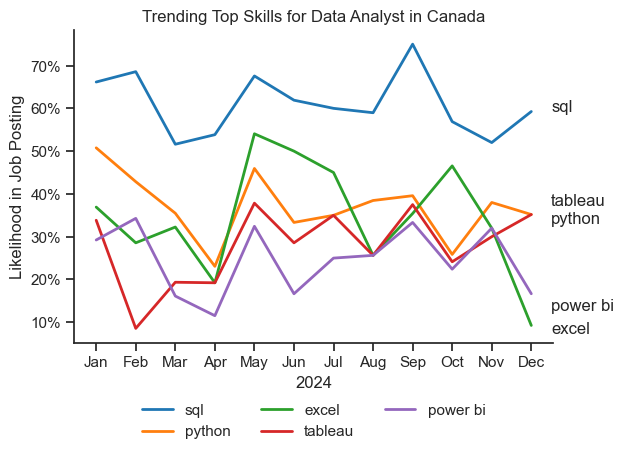

In [88]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_CA_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes =False,palette="tab10", linewidth=2)
sns.set_theme(style="ticks", palette="pastel")
sns.despine()


plt.title('Trending Top Skills for Data Analyst in Canada')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2024')
# plt.legend().remove()
# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Offset values for each label to avoid overlap
offsets = [0, -2, -2, 2, -4]  # Adjust these values as needed

for i in range(5):
    plt.text(
        11.5, 
        df_plot.iloc[-1, i] + offsets[i],  # Add offset to y position
        df_plot.columns[i]
    )
plt.tight_layout()
plt.show()